# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [56]:
n = 10

In [57]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [58]:
image = svg_graph(adjacency, position, names=np.arange(n))

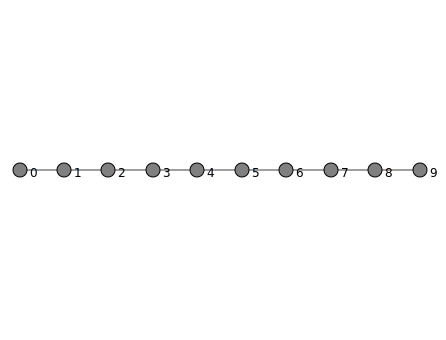

In [59]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [76]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [77]:
scores = pagerank.fit_transform(adjacency)

In [78]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

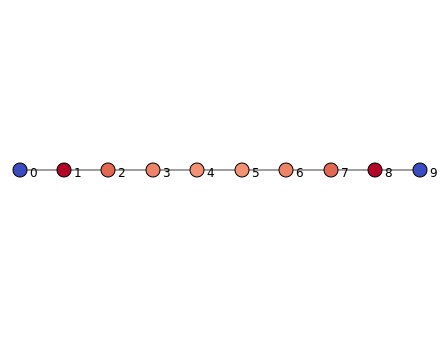

In [79]:
SVG(image)

In [80]:
top_k(scores, 2)

array([1, 8])

## Les Misérables


In [81]:
graph = miserables(True)

In [82]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [83]:
image = svg_graph(adjacency, position, names, scale=2)

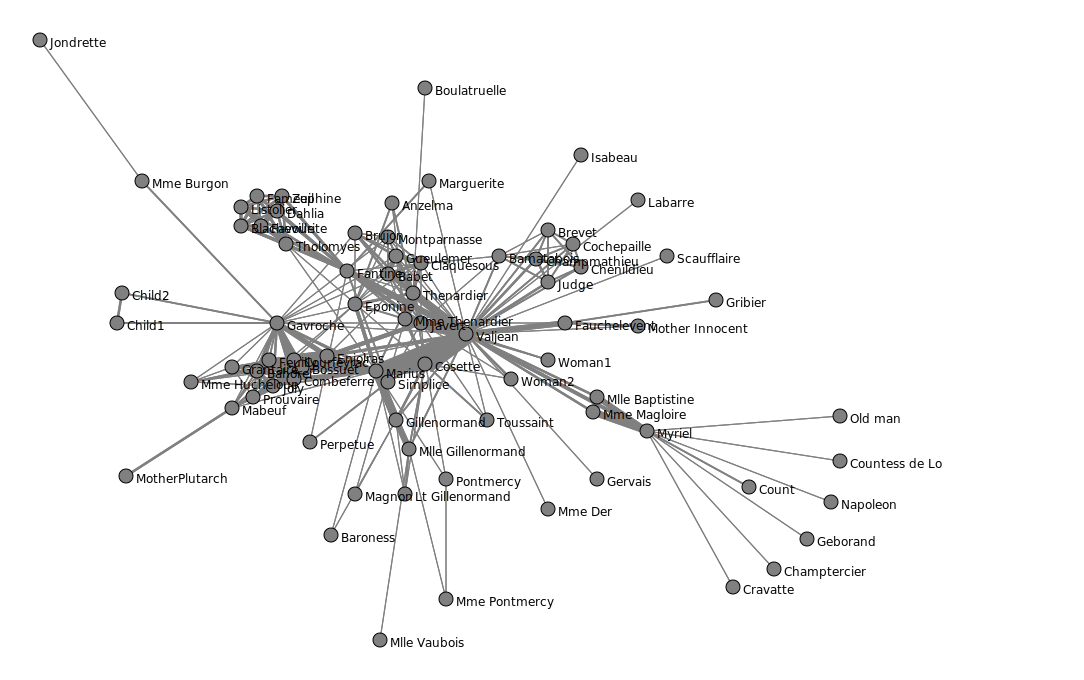

In [84]:
SVG(image)

## To do

* Show the graph with PageRank scores.<br>
**Hint:** Use the log of the scores for better visualization.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees,
    2. the 10 nodes of highest weights,
    3. the 10 most frequent nodes under neighbor sampling.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

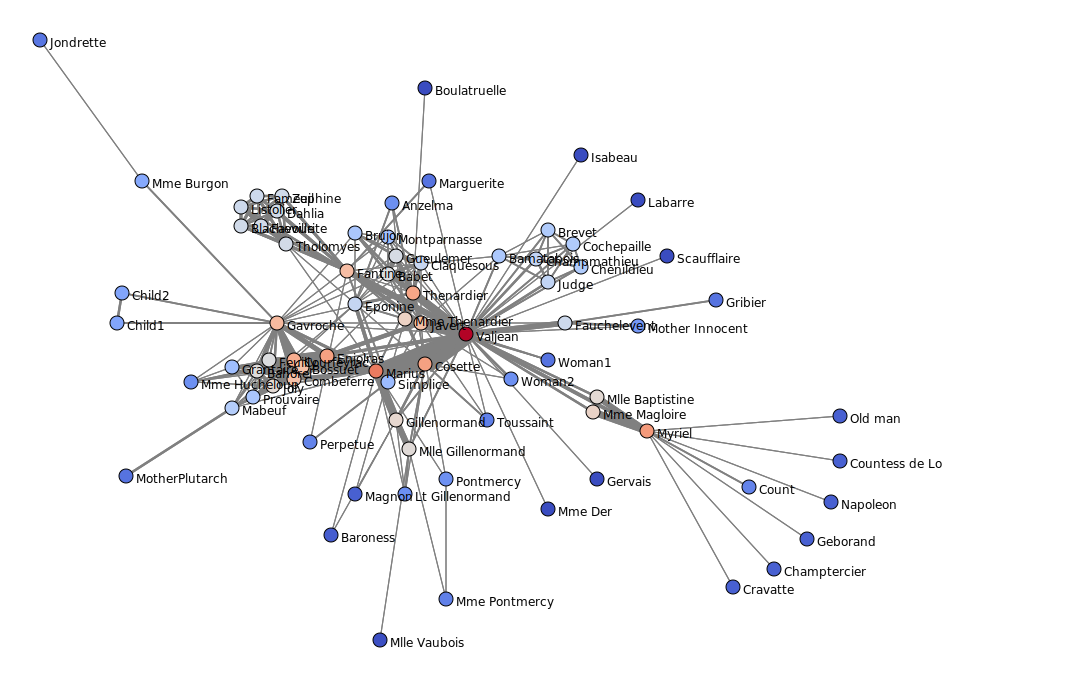

In [85]:
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, names, scale=2, scores=np.log(scores))
SVG(image)

In [86]:
idx = top_k(scores,10)
names[idx]

array(['Valjean', 'Marius', 'Myriel', 'Cosette', 'Enjolras', 'Thenardier',
       'Courfeyrac', 'Gavroche', 'Fantine', 'Javert'], dtype='<U17')

In [87]:
# Highest degree
idxtraffic = np.sum(adjacency>0,axis=1).flatten().argsort()[:,-10:]
np.flip(names[idxtraffic])

array([['Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier',
        'Fantine', 'Enjolras', 'Courfeyrac', 'Bossuet', 'Bahorel']],
      dtype='<U17')

In [88]:
# Highest weight
idxtraffic = np.sum(adjacency,axis=1).flatten().argsort()[:,-10:]
np.flip(names[idxtraffic])

array([['Valjean', 'Marius', 'Enjolras', 'Courfeyrac', 'Cosette',
        'Combeferre', 'Bossuet', 'Thenardier', 'Gavroche', 'Javert']],
      dtype='<U17')

In [96]:
# Neighbor samping
pagerank = PageRank(damping_factor=0, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
idx = top_k(scores,10)
names[idx]

array(['Myriel', 'Lt Gillenormand', 'Mlle Vaubois', 'Mme Pontmercy',
       'Mlle Gillenormand', 'Magnon', 'Gillenormand', 'Gavroche',
       'Mme Burgon', 'Jondrette'], dtype='<U17')

## Openflights


In [178]:
graph = openflights

In [179]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [180]:
# edges not displayed
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

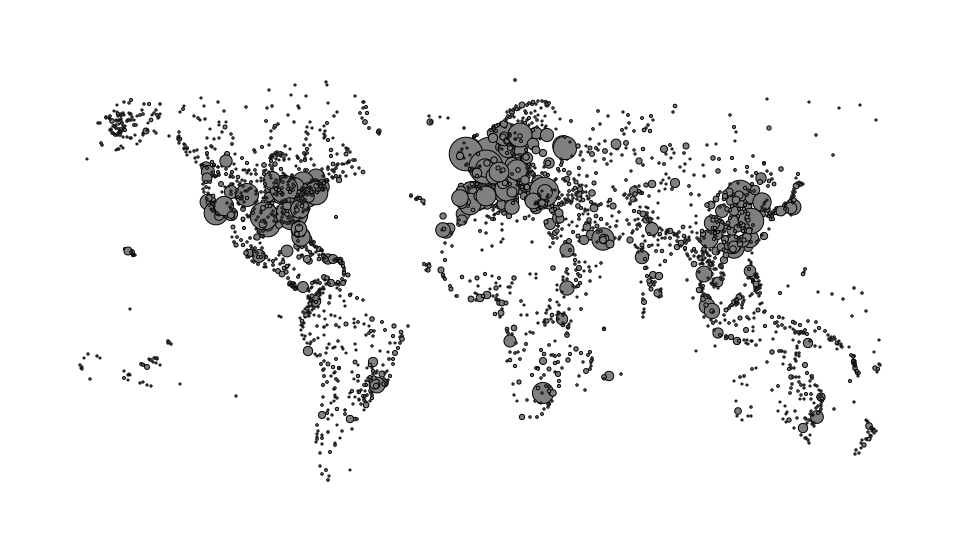

In [181]:
SVG(image)

## To do

* Show the same world map with PageRank scores.<br>
**Hint:** Display nodes in increasing order of scores using the parameter ``node_order`` for better visualization.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Tokyo** international airport.
* List the corresponding 10 best ranked airports.

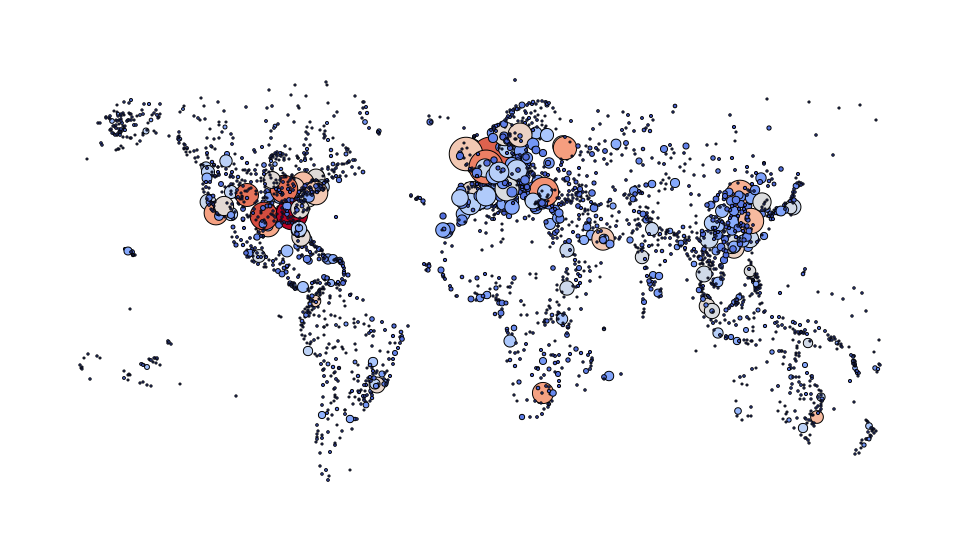

In [182]:
## Exercice
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False, scores=scores)
SVG(image)

In [183]:
idx = top_k(scores, 10)
names[idx]

array(['Hartsfield Jackson Atlanta International Airport',
       'Dallas Fort Worth International Airport',
       'Amsterdam Airport Schiphol',
       "Chicago O'Hare International Airport",
       'Denver International Airport',
       'Charles de Gaulle International Airport',
       'Atatürk International Airport',
       'Domodedovo International Airport',
       'Los Angeles International Airport',
       'OR Tambo International Airport'], dtype='<U65')

In [184]:
idxtraffic = np.sum(adjacency,axis=1).flatten().argsort()[:,-10:]
np.flip(names[idxtraffic])

array([['Amsterdam Airport Schiphol',
        'Charles de Gaulle International Airport', 'Dublin Airport',
        'Munich International Airport',
        'Hartsfield Jackson Atlanta International Airport',
        'London Gatwick Airport',
        'Frankfurt am Main International Airport',
        'Atatürk International Airport',
        'Dallas Fort Worth International Airport',
        'Beijing Capital International Airport']], dtype='<U65')

In [185]:
{i: name for i, name in enumerate(names) if 'Tokyo' in name}

{1084: 'Tokyo Haneda International Airport'}

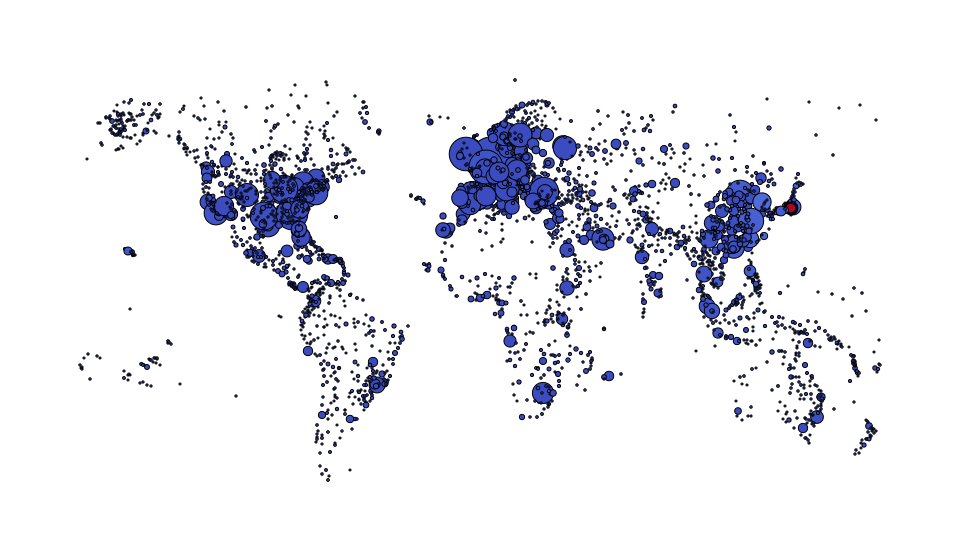

In [186]:
seeds = {1084:1}
scores = pagerank.fit_transform(adjacency, seeds)
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False, scores=scores, seeds=seeds)
SVG(image)

In [187]:
idx = top_k(scores, 10)
names[idx]

array(['Tokyo Haneda International Airport',
       'Incheon International Airport', 'Naha Airport',
       'Taiwan Taoyuan International Airport',
       'Osaka International Airport',
       'Shanghai Pudong International Airport', 'New Chitose Airport',
       'Kansai International Airport', 'Narita International Airport',
       'Beijing Capital International Airport'], dtype='<U65')

## 2. Digraphs

PageRank applies to directed graphs as well. In fact, it was originally designed for the Web graph, which is a directed graph.

## Wikipedia Vitals

In [188]:
graph = wikivitals

In [189]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [190]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')
scores = pagerank.fit_transform(adjacency)
idx = top_k(scores, 10)
names[idx]

array(['Bibliothèque nationale de France', 'United States',
       'Geographic coordinate system', 'The New York Times', 'France',
       'India', 'Latin', 'China', 'United Kingdom', 'World War II'],
      dtype='<U62')

In [191]:
#outdegree
idxtraffic = np.sum(adjacency>0,axis=1).flatten().argsort()[:,-10:]
print(np.flip(names[idxtraffic]))

[['Europe' 'History of the world' 'Modern history' 'France' 'Africa'
  'History of art' 'Asia' 'Russia' 'History of Europe' 'South America']]


In [192]:
#indegree
idxtraffic = np.sum(adjacency>0,axis=0).flatten().argsort()[:,-10:]
print(np.flip(names[idxtraffic]))

[['Bibliothèque nationale de France' 'United States' 'India' 'China'
  'The New York Times' 'France' 'Geographic coordinate system'
  'United Kingdom' 'World War II' 'Latin']]


In [195]:
#Top 20
idx = top_k(scores, 20)
print("PageRank top 20 : ",names[idx])
print(" ")

idxtraffic = np.sum(adjacency>0,axis=0).flatten().argsort()[:,-20:]
print("Indegree top 20 : ", np.flip(names[idxtraffic]))

PageRank top 20 :  ['Bibliothèque nationale de France' 'United States'
 'Geographic coordinate system' 'The New York Times' 'France' 'India'
 'Latin' 'China' 'United Kingdom' 'World War II' 'Encyclopædia Britannica'
 'Russia' 'Germany' 'Australia' 'Italy' 'Canada' 'Japan' 'Spain'
 'Greek language' 'Europe']
 
Indegree top 20 :  [['Bibliothèque nationale de France' 'United States' 'India' 'China'
  'The New York Times' 'France' 'Geographic coordinate system'
  'United Kingdom' 'World War II' 'Latin' 'Germany' 'Russia' 'Japan'
  'Italy' 'Australia' 'Spain' 'Canada' 'Europe' 'Encyclopædia Britannica'
  'Egypt']]


**The article that appears in PageRank and not in in-degree is Greek Language.**

## To do

* List the 20 closest pages to **Pablo Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [198]:
{i: name for i, name in enumerate(names) if 'Pablo Picasso' in name}

{4936: 'Pablo Picasso'}

In [200]:
seeds = {4936:1}
scores = pagerank.fit_transform(adjacency, seeds)
idx = top_k(scores, 20)
names[idx]

array(['Pablo Picasso', 'Bibliothèque nationale de France',
       'The New York Times', 'Paris', 'Modernism', 'Museum of Modern Art',
       'Cubism', 'Avant-garde', 'Symbolism (arts)', 'Impressionism',
       'Romanticism', 'Spain', 'France', 'Metropolitan Museum of Art',
       'Surrealism', 'United States', 'Geographic coordinate system',
       'Vincent van Gogh', 'World War II', 'Paul Cézanne'], dtype='<U62')

In [206]:
print({i: name for i, name in enumerate(names) if 'Cat' in name and len(name)==3})
print({i: name for i, name in enumerate(names) if 'Dog' in name and len(name)==3})

{1401: 'Cat'}
{1395: 'Dog'}


In [207]:
seeds = {1401: 1, 1395: 1}
scores = pagerank.fit_transform(adjacency, seeds)
idx = top_k(scores, 20)
names[idx]

array(['Dog', 'Cat', 'Bibliothèque nationale de France',
       'Taxonomy (biology)', 'Animal', 'Mammal', 'Chordate',
       'Middle Ages', 'India', 'The New York Times', 'China', 'Latin',
       'United States', 'Pinniped', 'Lion', 'Bear', 'Carl Linnaeus',
       'Leopard', 'Polar bear', 'Brown bear'], dtype='<U62')

## 3. Bigraphs

PageRank is less frequently used for bipartite graphs. It is very useful in this case as well.

## Cinema

In [5]:
graph = cinema

In [6]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [228]:
pagerank = BiPageRank()

In [229]:
scores = pagerank.fit_transform(biadjacency)

In [230]:
idx = top_k(scores,10)
print(movies[idx])

['The Walking Dead (TV series)' 'Tatort' 'Twin Peaks'
 'Homeland (TV series)' 'House of Cards (U.S. TV series)' 'Prêt-à-Porter'
 'St. Elsewhere' 'Peaky Blinders (TV series)' 'Seances'
 'Arrow (TV series)']


In [231]:
{i: name for i, name in enumerate(movies) if 'Mon Oncle' in name}

{43428: 'Mon Oncle'}

In [245]:
seeds = {43428: 1}
scores = pagerank.fit_transform(biadjacency, seeds)
idx = top_k(scores, 5)
movies[idx]

array(['Mon Oncle', 'Jour de fête', 'Cours du soir', 'Gai dimanche',
       'Touchez pas au grisbi'], dtype='<U95')

In [246]:
{i: name for i, name in enumerate(actors) if 'Catherine Deneuve' in name}

{2173: 'Catherine Deneuve'}

In [249]:
seeds = {2173: 1}
scores = pagerank.fit_transform(biadjacency, seeds)
idx = top_k(scores,20)
for i in idx:
    if i<len(actors):
        print(actors[i])

Catherine Deneuve
Elle Fanning
Sarah Wright
Ann Cusack
Patricia Dane
Max Perlich


## 4. Digraphs as bigraphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [5]:
graph = wikivitals

In [6]:
adjacency = graph.adjacency
names = graph.names

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.

In [48]:
bipagerank = BiPageRank()
bipagerank.fit(adjacency)
scores_row = bipagerank.scores_row_
scores_col = bipagerank.scores_col_
idx_row = top_k(scores_row,10)
idx_col = top_k(scores_col,10)
print("For rows ", names[idx_row])
print("For cols ", names[idx_col])

For rows  ['Europe' 'History of the world' 'Modern history' 'France' 'Africa'
 'History of art' 'United States' 'Russia' 'Asia' 'History of Europe']
For cols  ['Bibliothèque nationale de France' 'United States' 'The New York Times'
 'India' 'Geographic coordinate system' 'China' 'France' 'Latin'
 'United Kingdom' 'World War II']


In [40]:
d_out = adjacency.dot(np.ones(adjacency.shape[0]))
idx = np.flip(np.argsort(d_out))[:10]
names[idx]

array(['Europe', 'History of the world', 'Modern history', 'France',
       'Africa', 'History of art', 'Asia', 'Russia', 'History of Europe',
       'South America'], dtype='<U62')

In [43]:
d_in = adjacency.T.tocsr().dot(np.ones(adjacency.shape[0]))
idx = np.flip(np.argsort(d_in))[:10]
names[idx]

array(['Bibliothèque nationale de France', 'United States', 'India',
       'China', 'The New York Times', 'France',
       'Geographic coordinate system', 'United Kingdom', 'World War II',
       'Latin'], dtype='<U62')

## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for content recommendation, PageRank or BiPageRank?<br>
Justify your answer.

In [7]:
{i: name for i, name in enumerate(names) if 'Pablo Picasso' in name}

{4936: 'Pablo Picasso'}

In [8]:
seeds = {4936: 1}

In [9]:
bipagerank = BiPageRank()
scores = bipagerank.fit_transform(adjacency,seeds_row=seeds)
idx=top_k(scores,20)
names[idx]

array(['Pablo Picasso', 'Modernism', 'Cubism', 'Modern art',
       'Abstract expressionism', 'Impressionism', 'Surrealism',
       'Futurism', 'Symbolism (arts)', 'Expressionism', 'Pop art',
       'Avant-garde', 'Postmodernism', 'Paul Klee', 'Dada', 'Minimalism',
       'Thomas Mann', 'Modern architecture', 'Franz Kafka',
       '20th-century classical music'], dtype='<U62')

In [53]:
print({i: name for i, name in enumerate(names) if 'Cat' in name and len(name)==3})
print({i: name for i, name in enumerate(names) if 'Dog' in name and len(name)==3})

{1401: 'Cat'}
{1395: 'Dog'}


In [54]:
seeds = {1401: 1, 1395: 1}

In [55]:
bipagerank = BiPageRank()
scores = bipagerank.fit_transform(adjacency,seeds_col=seeds)
idx=top_k(scores,20)
names[idx]

array(['Brown bear', 'Pet', 'Bear', 'Pinniped', 'Coyote', 'Wolf', 'Tiger',
       'European badger', 'Mammal', 'Cougar', 'Lion', 'Cheetah',
       'Carnivora', 'Polar bear', 'Stoat', 'Sea otter', 'Jaguar',
       'Honey badger', 'Wolverine', 'Felidae'], dtype='<U62')

**The best algorithm for content recommandation would be BiPageRank because it gives us data related to the previous information. The PageRank algorithm only gives global information.**